# Data Loading and Cleaning

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
import re
import string
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANKIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANKIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('C:/Users/ANKIT/Desktop/train.csv')

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1


In [4]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.898321
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().sum().sum()

0

In [6]:
rows = df.shape[0]
columns = df.shape[1]

In [7]:
print('Total number of rows: '+str(rows))
print('Total number of columns: '+str(columns))
print('Missing values: '+str(df.isnull().sum().sum()))

Total number of rows: 159571
Total number of columns: 9
Missing values: 0


In [8]:
df.describe(include='all')

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
count,159571,159571,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
unique,159571,159571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,9fb51d8f83e4e2b9,Wikipedia= Nazi Germany: Phase 2 \n\nHello. I ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.898321
std,NaN,NaN,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [9]:
df['comment_text'].unique()

array(["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       ...,
       'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.',
       'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.',
       '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of communit

In [10]:
#Calculating words in comments
df['word_count'] = df['comment_text'].apply(lambda x: len(str(x).split(" ")))

In [11]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,word_count
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,42
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,18
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,42
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,112
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,13


In [12]:
data = df.iloc[:,2:9]

In [13]:
data.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [14]:
corr = data.corr()
corr

,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009,-0.967748
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600,-0.298666
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867,-0.702812
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128,-0.162925
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736,-0.677324
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000,-0.280144
clean,-0.967748,-0.298666,-0.702812,-0.162925,-0.677324,-0.280144,1.000000


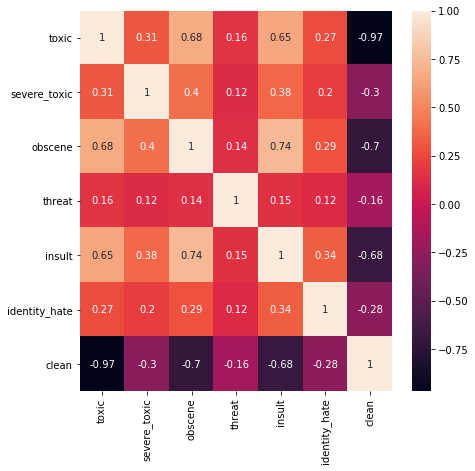

In [15]:
#heatmap
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True)

In [16]:
#Creating the column
data['clean'] = 10 

In [17]:
data.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0,0,0,0,0,0,10
1,0,0,0,0,0,0,10
2,0,0,0,0,0,0,10
3,0,0,0,0,0,0,10
4,0,0,0,0,0,0,10


In [18]:
data.loc[(data['severe_toxic']==0) & (data['threat']==0) & (data['identity_hate']==0) & (data['insult']==0) & (data['obscene']==0) & (data['toxic']==0), 'clean'] = 1

Text(0.5, 1.0, 'Category Distribution')

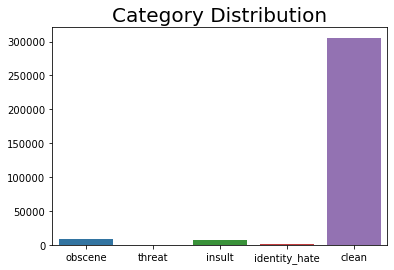

In [19]:
#Plot of Category Distribution
x = data.iloc[:,2:].sum()
sns.barplot(x.index,x.values)
plt.title('Category Distribution', fontsize=20)

In [20]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [21]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [22]:
#Flitering the comments based on Toxicity Level
clean_comment = " ".join(review for review in df[df['clean']==1]['comment_text'])
severe_toxic_comment = " ".join(review for review in df[df['severe_toxic']==1]['comment_text'])
threat_comment = " ".join(review for review in df[df['threat']==1]['comment_text'])
identity_hate_comment = " ".join(review for review in df[df['identity_hate']==1]['comment_text'])
insult_comment = " ".join(review for review in df[df['insult']==1]['comment_text'])
obscene_comment = " ".join(review for review in df[df['obscene']==1]['comment_text'])
toxic_comment = " ".join(review for review in df[df['toxic']==1]['comment_text'])

In [23]:
negative_comment = " ".join(review for review in df[(df['severe_toxic'] ==1 ) | (df['threat']==1) |(df['identity_hate']==1)
       | (df['insult']==1)|(df['obscene']==1) | (df['toxic']==1)]['comment_text'])

# Word Cloud

<Figure size 432x288 with 0 Axes>

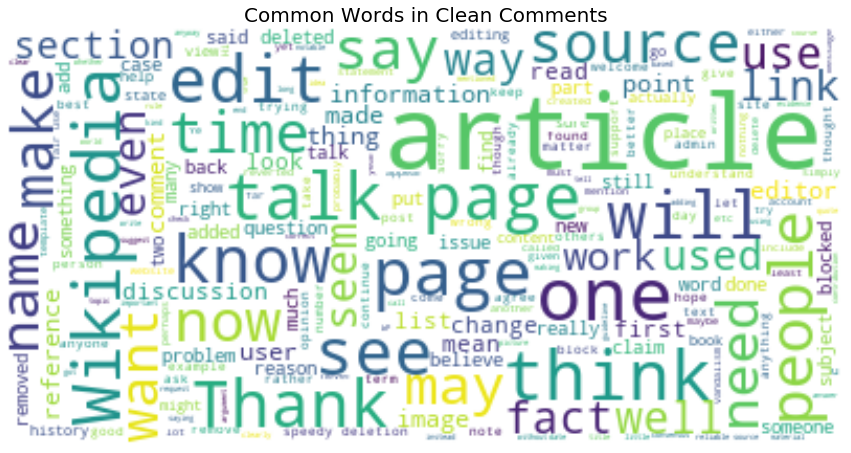

In [24]:
stopword=set(STOPWORDS)
wordcloud = WordCloud(max_font_size=50, max_words=3000, background_color="white",stopwords=stopword).generate(clean_comment)
plt.figure()
plt.figure(figsize=(15, 10))
plt.title("Common Words in Clean Comments", fontsize=20)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

<Figure size 432x288 with 0 Axes>

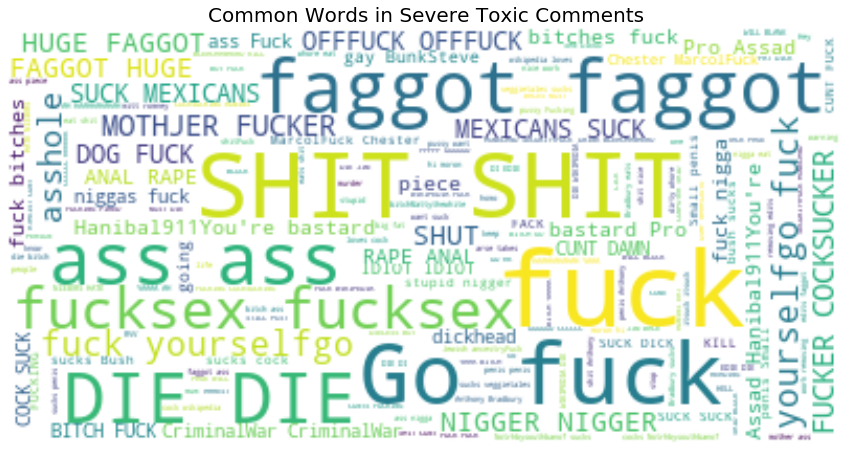

In [25]:
stopword=set(STOPWORDS)
wordcloud = WordCloud(max_font_size=50, max_words=3000, background_color="white",stopwords=stopword).generate(severe_toxic_comment)
plt.figure()
plt.figure(figsize=(15, 10))
plt.title("Common Words in Severe Toxic Comments", fontsize=20)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

<Figure size 432x288 with 0 Axes>

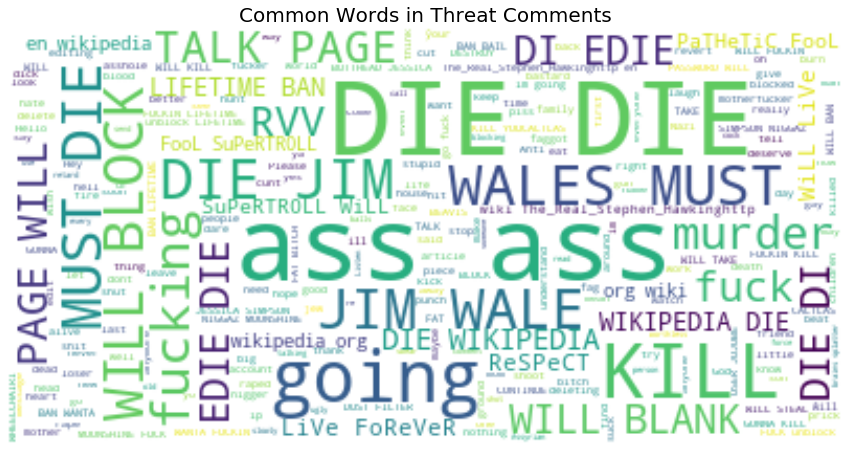

In [26]:
stopword=set(STOPWORDS)
wordcloud = WordCloud(max_font_size=50, max_words=3000, background_color="white",stopwords=stopword).generate(threat_comment)
plt.figure()
plt.figure(figsize=(15, 10))
plt.title("Common Words in Threat Comments", fontsize=20)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

<Figure size 432x288 with 0 Axes>

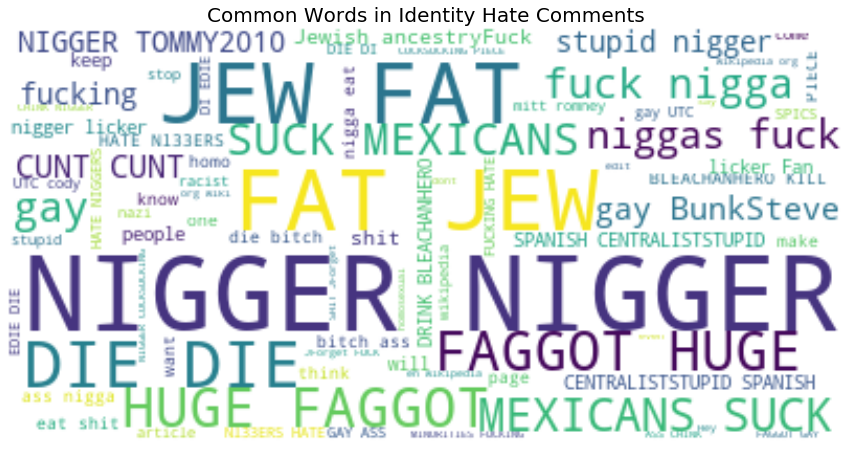

In [27]:
stopword=set(STOPWORDS)
wordcloud = WordCloud(max_font_size=50, max_words=3000, background_color="white",stopwords=stopword).generate(identity_hate_comment)
plt.figure()
plt.figure(figsize=(15, 10))
plt.title("Common Words in Identity Hate Comments", fontsize=20)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

<Figure size 432x288 with 0 Axes>

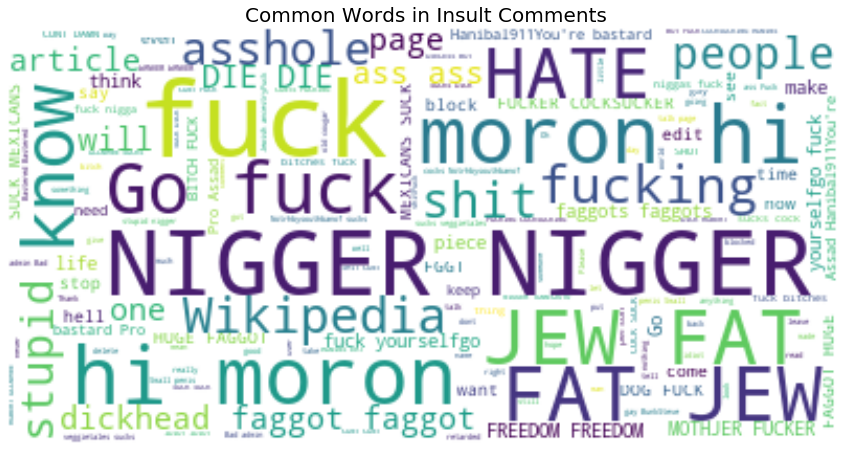

In [28]:
stopword=set(STOPWORDS)
wordcloud = WordCloud(max_font_size=50, max_words=3000, background_color="white",stopwords=stopword).generate(insult_comment)
plt.figure()
plt.figure(figsize=(15, 10))
plt.title("Common Words in Insult Comments", fontsize=20)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

<Figure size 432x288 with 0 Axes>

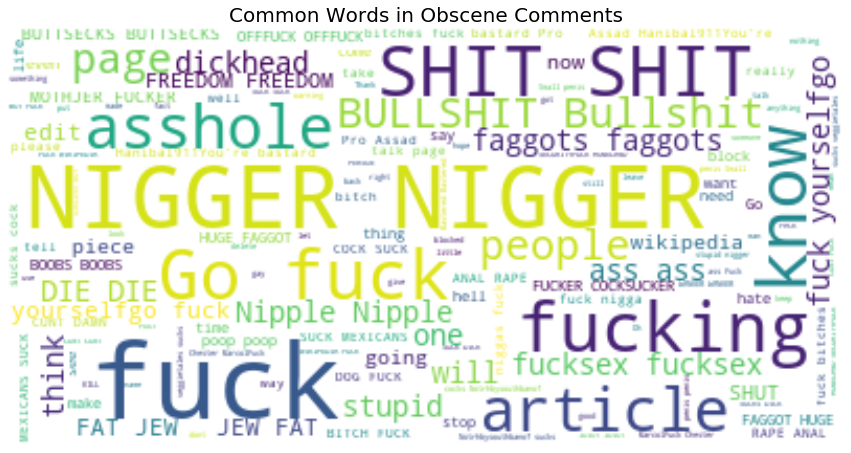

In [29]:
stopword=set(STOPWORDS)
wordcloud = WordCloud(max_font_size=50, max_words=3000, background_color="white",stopwords=stopword).generate(obscene_comment)
plt.figure()
plt.figure(figsize=(15, 10))
plt.title("Common Words in Obscene Comments", fontsize=20)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

<Figure size 432x288 with 0 Axes>

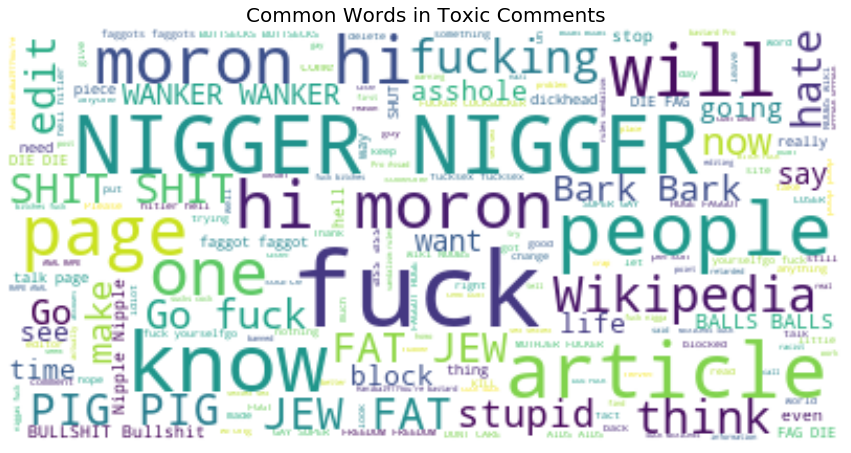

In [30]:
stopword=set(STOPWORDS)
wordcloud = WordCloud(max_font_size=50, max_words=3000, background_color="white",stopwords=stopword).generate(toxic_comment)
plt.figure()
plt.figure(figsize=(15, 10))
plt.title("Common Words in Toxic Comments", fontsize=20)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

<Figure size 432x288 with 0 Axes>

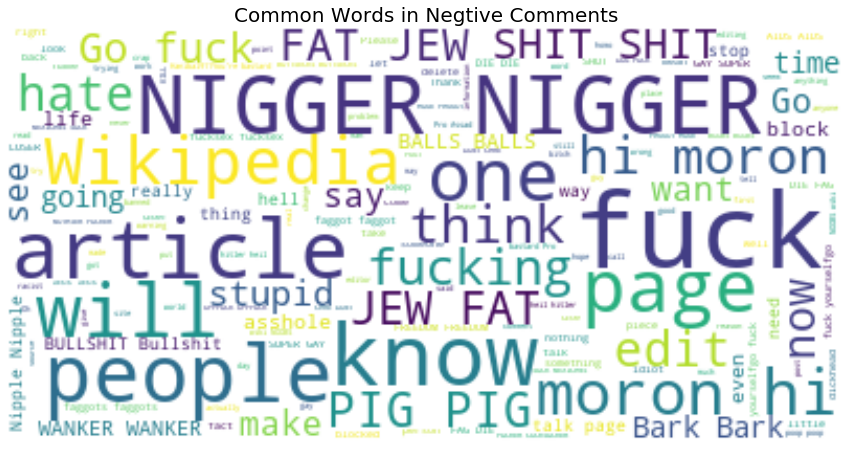

In [31]:
stopword=set(STOPWORDS)
wordcloud = WordCloud(max_font_size=50, max_words=3000, background_color="white",stopwords=stopword).generate(negative_comment)
plt.figure()
plt.figure(figsize=(15, 10))
plt.title("Common Words in Negtive Comments", fontsize=20)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

# Modeling

In [32]:
data1 = pd.read_csv('C:/Users/ANKIT/Desktop/train.csv')

In [33]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lem = WordNetLemmatizer()
tokenCV = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = tokenCV.tokenize)

In [34]:
w, h = 1,len(data1);
comments_clean = [[0 for x in range(w)] for y in range(h)] 

In [35]:
w, h = 2,len(data1);
comments_sa = [[0 for x in range(w)] for y in range(h)] 

In [36]:
for i in range(0,len(data1)):
    comments = data1.iloc[i,1]
    comments = comments.lower()
    comments = re.sub(r'\d+', '', comments)
    comments = comments.translate(str.maketrans("","", string.punctuation))
    comments = comments.strip()
    comments = lem.lemmatize(comments)
    tokens = word_tokenize(comments)
    comments = [j for j in tokens if not j in stop_words]
    comments_clean[i] = str(comments)

In [37]:
text_counts = cv.fit_transform(comments_clean)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(text_counts, data1.iloc[:,2:8], test_size=0.3, random_state=0)

In [39]:
l, b = len(y_test), 6;

In [40]:
#Prediction matrix for saving prediction from the model for each class 
pred_matrix = [[0 for x in range(l)] for y in range(b)] 
b = np.array(y_test.values.tolist())

In [41]:
#Logistic Regression Model
for i in range(0,6):
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train.iloc[:,i])
    pred_matrix[i] = logreg.predict(X_test)
prob = pd.DataFrame(data=pred_matrix)
prob_t = prob.T
print('Accuracy Score: ',str(accuracy_score(y_test, prob_t)))   
print('F1 Score: ',str(f1_score(y_test, prob_t, average="macro")))
print('Precision Score: ',str(precision_score(y_test, prob_t, average="macro")))
print('Recall Score: ',str(recall_score(y_test, prob_t, average="macro")))    
print(classification_report(y_test, prob_t))  

C:\Users\ANKIT\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ANKIT\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Accuracy Score:  0.9126420454545454
F1 Score:  0.47387722429226004
Precision Score:  0.6134418229384683
Recall Score:  0.3951659424641641
              precision    recall  f1-score   support

           0       0.86      0.67      0.75      4591
           1       0.47      0.23      0.31       485
           2       0.86      0.66      0.75      2527
           3       0.37      0.22      0.28       131
           4       0.74      0.47      0.58      2362
           5       0.38      0.12      0.18       430

   micro avg       0.81      0.57      0.67     10526
   macro avg       0.61      0.40      0.47     10526
weighted avg       0.79      0.57      0.66     10526
 samples avg       0.06      0.05      0.05     10526



C:\Users\ANKIT\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANKIT\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
#Multinomial Naive Bayes Model
for i in range(0,6):
    clf = MultinomialNB()
    clf.fit(X_train, y_train.iloc[:,i])
    pred_matrix[i] = clf.predict(X_test)
prob = pd.DataFrame(data=pred_matrix)
prob_t = prob.T
print('Accuracy Score: ',str(accuracy_score(y_test, prob_t)))   
print('F1 Score: ',str(f1_score(y_test, prob_t, average="macro")))
print('Precision Score: ',str(precision_score(y_test, prob_t, average="macro")))
print('Recall Score: ',str(recall_score(y_test, prob_t, average="macro")))    
print(classification_report(y_test, prob_t))

Accuracy Score:  0.8972886029411765
F1 Score:  0.3955198688723904
Precision Score:  0.42882119190327983
Recall Score:  0.3706797772619827
              precision    recall  f1-score   support

           0       0.73      0.58      0.65      4591
           1       0.34      0.40      0.37       485
           2       0.67      0.58      0.62      2527
           3       0.04      0.03      0.03       131
           4       0.60      0.51      0.55      2362
           5       0.19      0.12      0.15       430

   micro avg       0.64      0.53      0.58     10526
   macro avg       0.43      0.37      0.40     10526
weighted avg       0.64      0.53      0.58     10526
 samples avg       0.05      0.05      0.04     10526



C:\Users\ANKIT\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANKIT\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
#Random Forest Model
for i in range(0,6):
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train.iloc[:,i])
    pred_matrix[i] = rf.predict(X_test)
prob = pd.DataFrame(data=pred_matrix)
prob_t = prob.T
print('Accuracy Score: ',str(accuracy_score(y_test, prob_t)))   
print('F1 Score: ',str(f1_score(y_test, prob_t, average="macro")))
print('Precision Score: ',str(precision_score(y_test, prob_t, average="macro")))
print('Recall Score: ',str(recall_score(y_test, prob_t, average="macro")))    
print(classification_report(y_test, prob_t))

Accuracy Score:  0.9142922794117647
F1 Score:  0.42308061403177305
Precision Score:  0.7258176139377993
Recall Score:  0.3349791763706336
              precision    recall  f1-score   support

           0       0.88      0.59      0.71      4591
           1       0.51      0.12      0.19       485
           2       0.88      0.66      0.75      2527
           3       0.53      0.06      0.11       131
           4       0.81      0.48      0.61      2362
           5       0.75      0.10      0.17       430

   micro avg       0.86      0.53      0.66     10526
   macro avg       0.73      0.33      0.42     10526
weighted avg       0.84      0.53      0.64     10526
 samples avg       0.05      0.05      0.05     10526



C:\Users\ANKIT\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANKIT\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
#XGBoost Model
for i in range(0,6):
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train.iloc[:,i])
    pred_matrix[i] = xgb.predict(X_test)

prob = pd.DataFrame(data=pred_matrix)
prob_t = prob.T

print('Accuracy Score: ',str(accuracy_score(y_test, prob_t)))   
print('F1 Score: ',str(f1_score(y_test, prob_t, average="macro")))
print('Precision Score: ',str(precision_score(y_test, prob_t, average="macro")))
print('Recall Score: ',str(recall_score(y_test, prob_t, average="macro")))    
print(classification_report(y_test, prob_t))

Accuracy Score:  0.9161931818181818
F1 Score:  0.4928517973177137
Precision Score:  0.6926593901599108
Recall Score:  0.3939888118388724
              precision    recall  f1-score   support

           0       0.91      0.54      0.68      4591
           1       0.49      0.19      0.27       485
           2       0.87      0.69      0.77      2527
           3       0.51      0.18      0.26       131
           4       0.81      0.53      0.64      2362
           5       0.56      0.23      0.33       430

   micro avg       0.85      0.54      0.66     10526
   macro avg       0.69      0.39      0.49     10526
weighted avg       0.84      0.54      0.66     10526
 samples avg       0.05      0.05      0.05     10526



In [45]:
#TF-IDF
data2 = pd.read_csv('C:/Users/ANKIT/Desktop/train.csv')
data2.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1


In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(data2['comment_text'], data2.iloc[:,2:8], test_size=0.3, random_state=1)


In [47]:
#TF-IDF Vectorization with Word Level
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', stop_words='english',ngram_range=(2,3),max_features=5000,lowercase=False)
tfidf_vect.fit(data2['comment_text'])
xtrain_tfidf =  tfidf_vect.fit_transform(xtrain)
xtest_tfidf =  tfidf_vect.transform(xtest)

In [48]:
#TF-IDF Vectorization with Character Level
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char',stop_words='english', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(data2['comment_text'])
xtrain_tfidf_chars =  tfidf_vect_ngram_chars.fit_transform(xtrain) 
xtest_tfidf_chars =  tfidf_vect_ngram_chars.transform(xtest)

C:\Users\ANKIT\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:520: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"
C:\Users\ANKIT\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [49]:
#Stacking the faetures of Word and Character TF-IDF Level
X = sparse.hstack([xtrain_tfidf, xtrain_tfidf_chars])
x_test = sparse.hstack([xtest_tfidf, xtest_tfidf_chars])

In [50]:
#Creating matrix to store predicted values
l, b = len(ytrain), 6;
pred_matrix = [[0 for x in range(l)] for y in range(b)]

In [51]:
#Multinomial Naive Bayes Model
for i in range(0,6):
    mnb_model = MultinomialNB().fit(X, ytrain.iloc[:,i])
    pred_matrix[i]= mnb_model.predict(x_test)
pred_mnb = pd.DataFrame(data=pred_matrix)
pred_mnb_val =pred_mnb.T
print('Accuracy of the Logistic Regression model : '+str(metrics.accuracy_score(ytest, pred_mnb_val)))
print('Classification Report for Logistic Regression : ')
print(metrics.classification_report(ytest, pred_mnb_val))

Accuracy of the Logistic Regression model : 0.8944059157754011
Classification Report for Logistic Regression : 
              precision    recall  f1-score   support

           0       0.78      0.50      0.61      4695
           1       0.31      0.39      0.35       491
           2       0.75      0.53      0.62      2544
           3       0.03      0.04      0.03       154
           4       0.68      0.49      0.57      2387
           5       0.12      0.13      0.13       442

   micro avg       0.65      0.48      0.55     10713
   macro avg       0.44      0.35      0.38     10713
weighted avg       0.69      0.48      0.56     10713
 samples avg       0.04      0.04      0.04     10713



C:\Users\ANKIT\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANKIT\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
#Random Forest with n_estimators = 500/1000/1500
rfmodel = RandomForestClassifier(n_estimators=500)
rfmodel.fit(X, ytrain)
pred_matrix = rfmodel.predict(x_test)
pred2 = pd.DataFrame(data=pred_matrix)
from sklearn import metrics
print('Accuracy of the Random Forest model : '+str(metrics.accuracy_score(ytest, pred2)))
print('Classification Report for Random Forest : ')
print(metrics.classification_report(ytest, pred2))

Accuracy of the Random Forest model : 0.9094042446524064
Classification Report for Random Forest : 
              precision    recall  f1-score   support

           0       0.97      0.39      0.56      4695
           1       0.52      0.06      0.11       491
           2       0.95      0.50      0.66      2544
           3       0.45      0.03      0.06       154
           4       0.85      0.36      0.51      2387
           5       0.58      0.03      0.06       442

   micro avg       0.93      0.38      0.54     10713
   macro avg       0.72      0.23      0.33     10713
weighted avg       0.89      0.38      0.52     10713
 samples avg       0.04      0.03      0.03     10713



C:\Users\ANKIT\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANKIT\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
#Final Random Forest Model
rfmodel = RandomForestClassifier(n_estimators=100)
rfmodel.fit(X, ytrain)
pred_matrix = rfmodel.predict(x_test)
pred1 = pd.DataFrame(data=pred_matrix)
from sklearn import metrics
print('Accuracy of the Random Forest model : '+str(metrics.accuracy_score(ytest, pred1)))
print('Classification Report for Random Forest : ')
print(metrics.classification_report(ytest, pred1))

Accuracy of the Random Forest model : 0.9091535762032086
Classification Report for Random Forest : 
              precision    recall  f1-score   support

           0       0.98      0.39      0.56      4695
           1       0.51      0.05      0.10       491
           2       0.95      0.49      0.65      2544
           3       0.45      0.03      0.06       154
           4       0.85      0.36      0.50      2387
           5       0.60      0.03      0.06       442

   micro avg       0.93      0.37      0.53     10713
   macro avg       0.72      0.23      0.32     10713
weighted avg       0.90      0.37      0.52     10713
 samples avg       0.04      0.03      0.03     10713



C:\Users\ANKIT\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANKIT\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
submid = pd.DataFrame({'comment': data1["comment_text"]})
df1=pd.concat([submid, pd.DataFrame(pred_mnb_val)], axis=1)
df1 = df.rename(columns={0:'toxic', 1:'severe_toxic', 2:'obscene', 3:'threat', 4:'insult', 5:'identity_hate'})